In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_digits, load_sample_images
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, recall_score, classification_report

In [9]:
df = load_digits()
df['DESCR']

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [14]:
df.data.shape

(1797, 64)

In [11]:
df.target

array([0, 1, 2, ..., 8, 9, 8])

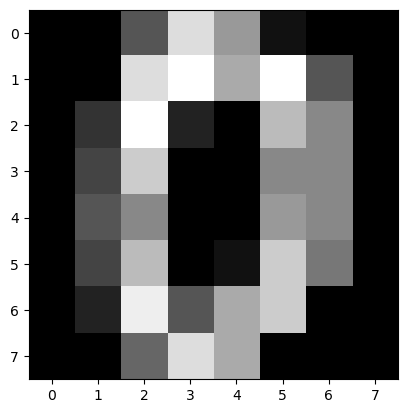

In [18]:
plt.imshow(df.data[0].reshape(8,8), cmap='gray')

In [22]:
X = pd.DataFrame(df.data, columns = df.feature_names)
y = df.target

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 64)
(540, 64)
(1257,)
(540,)


In [26]:
model_0 = KNeighborsClassifier()
model_0.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
y_train_pred_0 = model_0.predict(X_train)
y_test_pred_0 = model_0.predict(X_test)

In [54]:
print(accuracy_score(y_train_pred_0,y_train))
print(accuracy_score(y_test_pred_0,y_test))


0.9896579156722355
0.9925925925925926


In [32]:
print(confusion_matrix(y_train_pred_0,y_train))

[[125   0   0   0   0   0   0   0   0   0]
 [  0 132   0   0   0   0   0   0   3   0]
 [  0   0 129   0   0   0   0   0   0   0]
 [  0   0   0 127   0   0   0   0   1   1]
 [  0   0   0   0 120   0   0   0   0   0]
 [  0   0   0   0   0 114   0   0   0   1]
 [  0   0   0   0   0   0 128   0   0   0]
 [  0   0   1   2   1   0   0 124   0   0]
 [  0   0   0   0   0   0   0   0 127   1]
 [  0   0   0   0   0   2   0   0   0 118]]


In [37]:
f1_score(y_train_pred_0,y_train, average= 'macro' )

0.989633785138861

In [38]:
param_grid = [{'n_neighbors' : [3,5,7,9,10],
               'weights' : ['uniform', 'distance'],
               
             }]

In [39]:
model_1 = GridSearchCV(estimator= KNeighborsClassifier(), param_grid=param_grid, cv = 3, verbose=1)
model_1.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 7, 9, 10],
                          'weights': ['uniform', 'distance']}],
             verbose=1)

In [40]:
model_1.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [41]:
model_1.best_score_

0.9809069212410501

In [56]:
def model_accuracy(x):
    train_pred = x.predict(X_train)
    test_pred = x.predict(X_test)
    print("Training accuracy is: ", accuracy_score(y_train, train_pred ))
    print("Testing accuracy is: ", accuracy_score(y_test, test_pred ))

In [57]:
model_accuracy(model_1)

Training accuracy is:  1.0
Testing accuracy is:  0.9888888888888889


In [65]:
print(classification_report(y_train, y_train_pred_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       132
           2       1.00      1.00      1.00       130
           3       1.00      1.00      1.00       129
           4       1.00      1.00      1.00       121
           5       1.00      1.00      1.00       116
           6       1.00      1.00      1.00       128
           7       1.00      1.00      1.00       124
           8       1.00      1.00      1.00       131
           9       1.00      1.00      1.00       121

    accuracy                           1.00      1257
   macro avg       1.00      1.00      1.00      1257
weighted avg       1.00      1.00      1.00      1257



In [66]:
print(classification_report(y_test, y_test_pred_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.99      1.00      0.99        66
           6       1.00      1.00      1.00        53
           7       1.00      0.98      0.99        55
           8       0.98      0.98      0.98        43
           9       0.98      0.93      0.96        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

